In [1]:
import numpy as np 
import pandas as pd 
from keras.utils import to_categorical
data_train = pd.read_csv('../input/fashion-mnist_train.csv')
data_test = pd.read_csv('../input/fashion-mnist_test.csv')

X_train = np.array(data_train.iloc[:, 1:])
X_test = np.array(data_test.iloc[:, 1:])
y_train = to_categorical(np.array(data_train.iloc[:, 0]))
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

Using TensorFlow backend.


In [2]:
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

input_shape = (img_rows, img_cols, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [6]:
hist = model.fit(X_train, y_train,
          batch_size=50,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 142s - loss: 0.5845 - acc: 0.7921 - val_loss: 0.3807 - val_acc: 0.8628
Epoch 2/10
60000/60000 [==============================] - 141s - loss: 0.4010 - acc: 0.8548 - val_loss: 0.3092 - val_acc: 0.8843
Epoch 3/10
60000/60000 [==============================] - 142s - loss: 0.3591 - acc: 0.8676 - val_loss: 0.2832 - val_acc: 0.8952
Epoch 4/10
60000/60000 [==============================] - 143s - loss: 0.3302 - acc: 0.8788 - val_loss: 0.2711 - val_acc: 0.8987
Epoch 5/10
60000/60000 [==============================] - 142s - loss: 0.3108 - acc: 0.8868 - val_loss: 0.2729 - val_acc: 0.8981
Epoch 6/10
60000/60000 [==============================] - 141s - loss: 0.2997 - acc: 0.8905 - val_loss: 0.2680 - val_acc: 0.9007
Epoch 7/10
60000/60000 [==============================] - 141s - loss: 0.2864 - acc: 0.8954 - val_loss: 0.2454 - val_acc: 0.9095
Epoch 8/10
60000/60000 [=======================

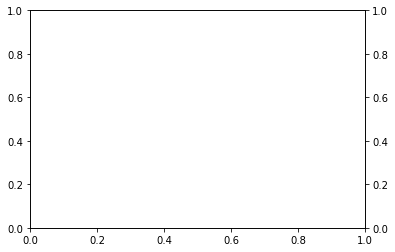

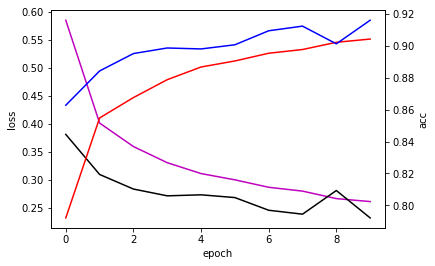

In [7]:
from matplotlib import pyplot as plt
fig, loss_plt = plt.subplots()

acc_plt = loss_plt.twinx()

loss_plt.plot(hist.history['loss'], 'm')
loss_plt.plot(hist.history['val_loss'], 'k')

acc_plt.plot(hist.history['acc'], 'r' )
acc_plt.plot(hist.history['val_acc'], 'b')

loss_plt.set_xlabel('epoch')
loss_plt.set_ylabel('loss')
acc_plt.set_ylabel('acc')



plt.show()